In [8]:
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
#MNIST download
mnist = fetch_openml('mnist_784', version=1,)
print('Data shape', mnist.data.shape)
print('Data target shape', mnist.target.shape)

Data shape (70000, 784)
Data target shape (70000,)


In [9]:
# We first split our data into train and test file
# Note that we limit the size of data size to shorten the calculation time
train_size   = 1000
test_size = 200
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, 
                                                    train_size=train_size, 
                                                    test_size=test_size,
                                                    random_state=37)

# We train the logistic model with softmax function
# by set the multi_class parameter to 'multinomial'
logisticRegr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logisticRegr.fit(x_train, y_train)

# We then predict using the test data set
acc = logisticRegr.score(x_test, y_test)
print('Accuracy on test set: ', acc)

Accuracy on test set:  0.855


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Showing data and predicting result for x_test[6]


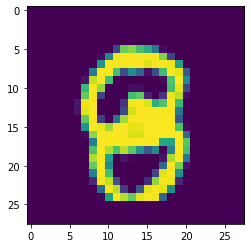

class = 0   u_k = -13.683   z_k = ?
class = 1   u_k =  -8.555   z_k = ?
class = 2   u_k =  13.904   z_k = ?
class = 3   u_k =  13.351   z_k = ?
class = 4   u_k =   3.644   z_k = ?
class = 5   u_k = -20.365   z_k = ?
class = 6   u_k =   0.008   z_k = ?
class = 7   u_k = -33.632   z_k = ?
class = 8   u_k =  26.583   z_k = ?
class = 9   u_k =  18.744   z_k = ?
y_predict = 8 , y_true = 8


In [10]:
#@title Choose an sample to show (0 <= index < 200) { run: "auto", vertical-output: true }
index =  6#@param {type:"integer"}
# Choose data index between 0 and 100

# We calculate u and z for this data
print('Showing data and predicting result for x_test[%d]' % index)
x = x_test[index]
U = np.dot(x, logisticRegr.coef_.T) + logisticRegr.intercept_
Z = logisticRegr.predict_proba([x])

plt.imshow(x.reshape(28, 28))
plt.show()

for y, (u, z) in enumerate(zip(U, Z[0])):
    print('class = %d   u_k = %7.3f   z_k = ?' % (y, u))
print('y_predict = %d , y_true = %d' % (int(logisticRegr.predict([x])[0]), 
                                        int(y_test[index])))

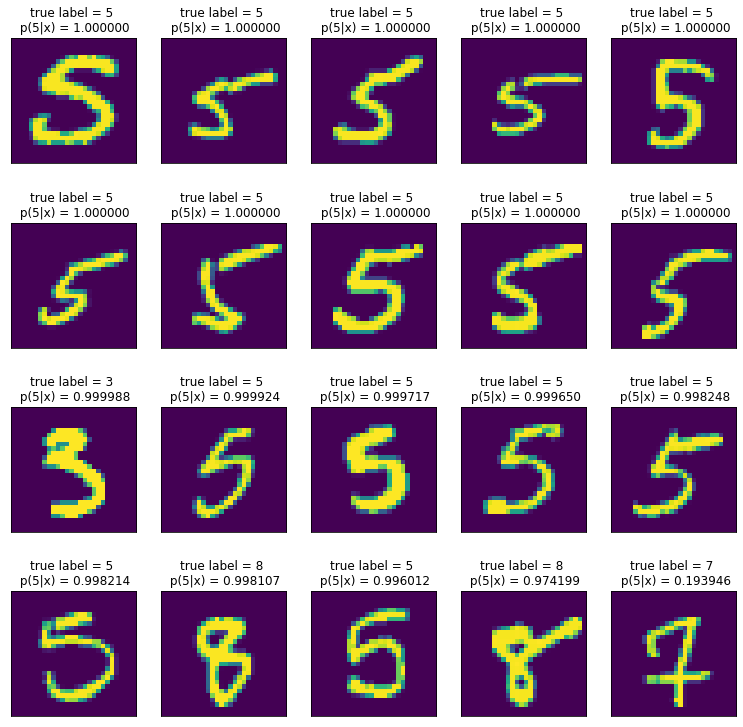

In [11]:
#@title Choose a class to show result (0 <= class_no <= 9) { run: "auto", vertical-output: true, display-mode: "both" }
class_no = 5 #@param {type:"integer"}
# Let choose a digit and get top 10 test sample
# that have the highest prediction's probability value
x_test_proba = logisticRegr.predict_proba(x_test)[:, class_no]
sorted_index = np.argsort(x_test_proba)[::-1]

fig, ax = plt.subplots(nrows=4, ncols= 5, figsize=(13,13))
ax = ax.flat
for idx, index in enumerate(sorted_index[:20]):
    ax[idx].imshow(x_test[index].reshape(28, 28))
    ax[idx].set_xticks(ticks=[])
    ax[idx].set_yticks(ticks=[])
    ax[idx].set_title('true label = %d \n p(%d|x) = %5f' % ( int(y_test[index]), class_no,
                                         x_test_proba[index]))
plt.show()